First we will plot graident field and then see how the function behaves by plotting its 3D surface and 2D contour(graphical technique for representing a 3D surface by plotting constant z slices) and changing parameters.Then we would follow up with illustration of gradient descent

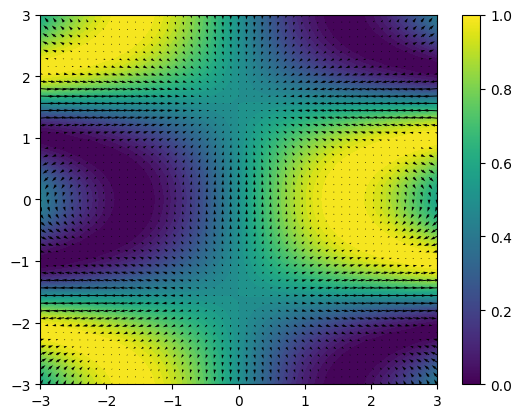

In [7]:


#gradient fields
import numpy as np
import matplotlib.pyplot as plt

xx=np.linspace(-3,3,51)#creating a set of points that goes from -3 to +3 in 51 steps.
X,Y = np.meshgrid(xx,xx)
Z= np.sin(X*np.cos(Y)) #our multivatiate function
gx,gy=np.gradient(Z)# computing two partial derivatives ie gradeint of the multivariate function Z
plt.contourf(X, Y, Z, 40)
plt.quiver(X,Y,gx,gy)

plt.colorbar()  # To show the color scale
plt.show()



### if we look closely on the gradient field above we will see the arrows are pointing away from the dark blue color(it corresponds to negative values in the function) towards the yellow color (it corresponds to positive values in the function). The arrows basically points to the gradients of the function, and whereever the function is growing or getting larger its pointing towards that direction , soits ponting from blue t ogreen to yellow.

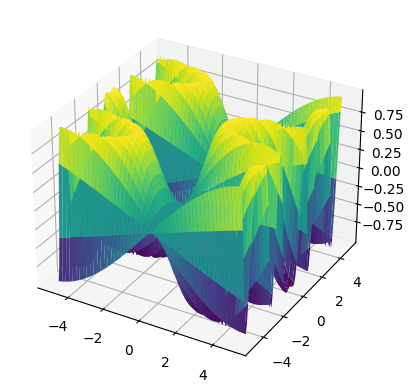

In [8]:
#3d surface plot of the same function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the grid and function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X * np.cos(Y))


# Create the 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')



plt.show()


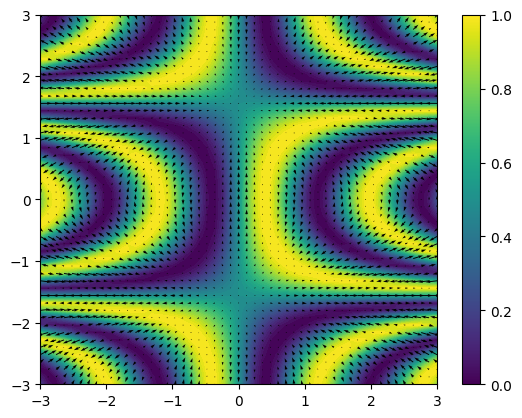

In [9]:
#Changing parameters to modulate frequency
import numpy as np
import matplotlib.pyplot as plt
f1=4
#the parameter would modulate the frequency
xx=np.linspace(-3,3,51)#creating a set of points that goes from -3 to +3 in 51 steps.
X,Y = np.meshgrid(xx,xx)


Z= np.sin(f1*X*np.cos(Y)) #our multivatiate function
gx,gy=np.gradient(Z)# computing two partial derivatives ie gradeint of the multivariate function Z

plt.contourf(X, Y, Z, 40)
plt.quiver(X,Y,gx,gy)

plt.colorbar()
plt.show()

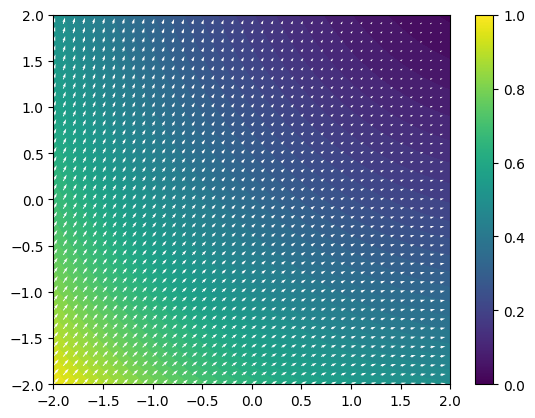

In [10]:
#Illustrating gradient descent

import numpy as np
import matplotlib.pyplot as plt

# Assuming some true m and c
m_true = 2
c_true = 3

# Generate some example data
x_values = np.linspace(-2, 2, 41)
y_actual = m_true * x_values + c_true + np.random.normal(scale=3, size=len(x_values))  # added some noise

# Define the grid for m and c
m_values = np.linspace(-2, 2, 41)
c_values = np.linspace(-2, 2, 41)
M, C = np.meshgrid(m_values, c_values)

# Function to compute MSE
def compute_mse(m, c, x_values, y_actual):
    y_pred = m * x_values + c
    mse = np.mean((y_pred - y_actual) ** 2)
    return mse

# Compute the MSE for each (m, c) pair
Z = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        Z[i, j] = compute_mse(M[i, j], C[i, j], x_values, y_actual)

# Compute the gradients
gm, gc = np.gradient(Z)

# Now you can plot the objective function and the gradients
plt.contourf(M, C, Z, 40)
plt.quiver(M, C, -gm, -gc,color='w')  # We plot -gm and -gc to show the descent direction
plt.colorbar()
plt.show()



### In a gradient descent, we are interested in minimizing the cost function. The arrows in a gradient vector field point in the direction of greatest rate of increase of the function. Therefore, to descend (minimize our function), we go in the opposite direction, i.e., against the arrows.In the plot  yellow represents high values (peak of the function), and dark blue represents low values (valley of the function). The negative gradient (-gm, -gc) shows the direction of steepest descent, which is from high to low values. So the arrows are indeed pointing from yellow (high MSE) to dark blue (low MSE) areas, showing the direction we would want to go if we were using gradient descent to minimize the MSE.

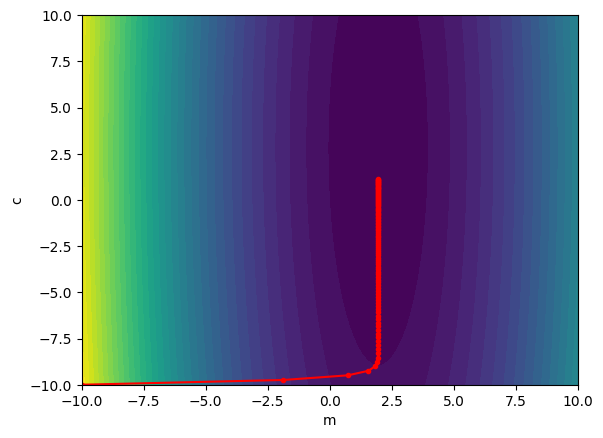

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming some true m and c
m_true = 2
c_true = 3

# Generate some example data
x_values = np.linspace(-10, 10, 100)
y_actual = m_true * x_values + c_true + np.random.normal(scale=3, size=len(x_values))  # added some noise

# Define the grid for m and c
m_values = np.linspace(-10, 10, 100)
c_values = np.linspace(-10, 10, 100)
M, C = np.meshgrid(m_values, c_values)

# Function to compute MSE
def compute_mse(m, c, x_values, y_actual):
    y_pred = m * x_values + c
    mse = np.mean((y_pred - y_actual) ** 2)
    return mse

# Compute the MSE for each (m, c) pair
Z = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        Z[i, j] = compute_mse(M[i, j], C[i, j], x_values, y_actual)

# Starting parameters for gradient descent
m_current = -10
c_current = -10

# Learning rate
lr = 0.01

# Lists to hold the m, c and mse values
m_list = [m_current]
c_list = [c_current]
mse_list = [compute_mse(m_current, c_current, x_values, y_actual)]

# Gradient descent loop
for i in range(100):
    y_pred = m_current * x_values + c_current
    gm = -2 * np.mean((y_actual - y_pred) * x_values)  # Gradient w.r.t m
    gc = -2 * np.mean(y_actual - y_pred)  # Gradient w.r.t c
    m_current -= lr * gm
    c_current -= lr * gc
    mse_current = compute_mse(m_current, c_current, x_values, y_actual)
    m_list.append(m_current)
    c_list.append(c_current)
    mse_list.append(mse_current)

# Plot the contour plot
plt.contourf(M, C, Z, 40)

# Plot the trajectory of the gradient descent
plt.plot(m_list, c_list, 'r.-')

plt.xlabel('m')
plt.ylabel('c')
plt.show()



###Above I've performed gradient descent and kept track of the m and c values at each step. The gradient descent process is then visualized by showing a line tracing the values of m and c through the iterations of the gradient descent algorithm. This line shows the path that gradient descent took through the parameter space. The red line starts from the initial guess of m and c and moves towards the values that minimize the MSE. The dots in the line represent the values of m and c at each step.In the Machine Learning gradient descent algorithm , we use the learning rate to determine the size of the step we take in the direction of steepest descent. The learning rate is a hyperparameter that controls how much we are adjusting the weights of our network with respect to the loss gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we are going to spend a lot of time to converge — especially if we get stuck on a plateau region.In the example I provided for showing gradient descent trajectory , we're dynamically performing the gradient descent algorithm and visualizing the path it takes. In this case, the learning rate is crucial because it controls how big of a step we take on each iteration of the gradient descent algorithm.So, the learning rate is a key part of the gradient descent algorithm, but it's not necessarily something we would represent in a static visualization of a gradient field.
